__Libraries__

In [31]:
import os
import shutil
import random
from collections import Counter
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

__Convolutional Neural Network Setup (EfficientNetB7)__

In [32]:
file_location = os.getcwd()

train_path = file_location+"/data/train"
valid_path = file_location+"/data/valid"
test_path = file_location+"/data/test"
test_TI_SD1_path = file_location+"/data/TISD1"
test_TI_SD2_path = file_location+"/data/TISD2"

In [33]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD1_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet.preprocess_input).flow_from_directory(directory=test_TI_SD1_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD2_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet.preprocess_input).flow_from_directory(directory=test_TI_SD2_path,target_size=(224,224), batch_size=10, shuffle=False)

Found 330 images belonging to 5 classes.
Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.


In [34]:
efficientnetb7 = tf.keras.applications.efficientnet.EfficientNetB7()
#efficientnetb7.summary()

In [35]:
efficientnetb7.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 600, 600, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 600, 600, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

                                                                                                  
 block1c_dwconv (DepthwiseConv2  (None, 300, 300, 32  288        ['block1b_add[0][0]']            
 D)                             )                                                                 
                                                                                                  
 block1c_bn (BatchNormalization  (None, 300, 300, 32  128        ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 300, 300, 32  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_s

 )                              2)                                                                
                                                                                                  
 block2a_activation (Activation  (None, 150, 150, 19  0          ['block2a_bn[0][0]']             
 )                              2)                                                                
                                                                                                  
 block2a_se_squeeze (GlobalAver  (None, 192)         0           ['block2a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2a_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block2a_se_squeeze[0][0]']     
                                                                                                  
 block2a_s

 block2c_se_squeeze (GlobalAver  (None, 288)         0           ['block2c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2c_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2c_se_squeeze[0][0]']     
                                                                                                  
 block2c_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2c_se_reshape[0][0]']     
                                                                                                  
 block2c_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2c_se_reduce[0][0]']      
                                                                                                  
 block2c_se_excite (Multiply)   (None, 150, 150, 28  0           ['block2c_activation[0][0]',     
          

                                                                                                  
 block2e_se_squeeze (GlobalAver  (None, 288)         0           ['block2e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2e_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2e_se_squeeze[0][0]']     
                                                                                                  
 block2e_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2e_se_reshape[0][0]']     
                                                                                                  
 block2e_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2e_se_reduce[0][0]']      
                                                                                                  
 block2e_s

 )                              8)                                                                
                                                                                                  
 block2g_se_squeeze (GlobalAver  (None, 288)         0           ['block2g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2g_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2g_se_squeeze[0][0]']     
                                                                                                  
 block2g_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2g_se_reshape[0][0]']     
                                                                                                  
 block2g_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2g_se_reduce[0][0]']      
          

                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3b_se_reduce[0][0]']      
                                                                                                  
 block3b_se_excite (Multiply)   (None, 75, 75, 480)  0           ['block3b_activation[0][0]',     
                                                                  'block3b_se_expand[0][0]']      
                                                                                                  
 block3b_p

 block3d_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3d_se_reduce[0][0]']      
                                                                                                  
 block3d_se_excite (Multiply)   (None, 75, 75, 480)  0           ['block3d_activation[0][0]',     
                                                                  'block3d_se_expand[0][0]']      
                                                                                                  
 block3d_project_conv (Conv2D)  (None, 75, 75, 80)   38400       ['block3d_se_excite[0][0]']      
                                                                                                  
 block3d_project_bn (BatchNorma  (None, 75, 75, 80)  320         ['block3d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3d_d

 block3f_project_conv (Conv2D)  (None, 75, 75, 80)   38400       ['block3f_se_excite[0][0]']      
                                                                                                  
 block3f_project_bn (BatchNorma  (None, 75, 75, 80)  320         ['block3f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3f_drop (Dropout)         (None, 75, 75, 80)   0           ['block3f_project_bn[0][0]']     
                                                                                                  
 block3f_add (Add)              (None, 75, 75, 80)   0           ['block3f_drop[0][0]',           
                                                                  'block3e_add[0][0]']            
                                                                                                  
 block3g_e

 block4a_project_bn (BatchNorma  (None, 38, 38, 160)  640        ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 38, 38, 960)  153600      ['block4a_project_bn[0][0]']     
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, 38, 38, 960)  3840       ['block4b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4b_expand_activation (Act  (None, 38, 38, 960)  0          ['block4b_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block4d_expand_bn (BatchNormal  (None, 38, 38, 960)  3840       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 38, 38, 960)  0          ['block4d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4d_dwconv (DepthwiseConv2  (None, 38, 38, 960)  8640       ['block4d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4d_bn (BatchNormalization  (None, 38, 38, 960)  3840       ['block4d_dwconv[0][0]']         
 )        

                                                                                                  
 block4f_dwconv (DepthwiseConv2  (None, 38, 38, 960)  8640       ['block4f_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4f_bn (BatchNormalization  (None, 38, 38, 960)  3840       ['block4f_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4f_activation (Activation  (None, 38, 38, 960)  0          ['block4f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4f_s

 )                                                                                                
                                                                                                  
 block4h_activation (Activation  (None, 38, 38, 960)  0          ['block4h_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4h_se_squeeze (GlobalAver  (None, 960)         0           ['block4h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4h_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4h_se_squeeze[0][0]']     
                                                                                                  
 block4h_s

 block4j_se_squeeze (GlobalAver  (None, 960)         0           ['block4j_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4j_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4j_se_squeeze[0][0]']     
                                                                                                  
 block4j_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block4j_se_reshape[0][0]']     
                                                                                                  
 block4j_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block4j_se_reduce[0][0]']      
                                                                                                  
 block4j_se_excite (Multiply)   (None, 38, 38, 960)  0           ['block4j_activation[0][0]',     
          

 block5b_se_excite (Multiply)   (None, 38, 38, 1344  0           ['block5b_activation[0][0]',     
                                )                                 'block5b_se_expand[0][0]']      
                                                                                                  
 block5b_project_conv (Conv2D)  (None, 38, 38, 224)  301056      ['block5b_se_excite[0][0]']      
                                                                                                  
 block5b_project_bn (BatchNorma  (None, 38, 38, 224)  896        ['block5b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_drop (Dropout)         (None, 38, 38, 224)  0           ['block5b_project_bn[0][0]']     
                                                                                                  
 block5b_a

 block5d_project_conv (Conv2D)  (None, 38, 38, 224)  301056      ['block5d_se_excite[0][0]']      
                                                                                                  
 block5d_project_bn (BatchNorma  (None, 38, 38, 224)  896        ['block5d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5d_drop (Dropout)         (None, 38, 38, 224)  0           ['block5d_project_bn[0][0]']     
                                                                                                  
 block5d_add (Add)              (None, 38, 38, 224)  0           ['block5d_drop[0][0]',           
                                                                  'block5c_add[0][0]']            
                                                                                                  
 block5e_e

 lization)                                                                                        
                                                                                                  
 block5f_drop (Dropout)         (None, 38, 38, 224)  0           ['block5f_project_bn[0][0]']     
                                                                                                  
 block5f_add (Add)              (None, 38, 38, 224)  0           ['block5f_drop[0][0]',           
                                                                  'block5e_add[0][0]']            
                                                                                                  
 block5g_expand_conv (Conv2D)   (None, 38, 38, 1344  301056      ['block5f_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5g_e

                                                                                                  
 block5h_add (Add)              (None, 38, 38, 224)  0           ['block5h_drop[0][0]',           
                                                                  'block5g_add[0][0]']            
                                                                                                  
 block5i_expand_conv (Conv2D)   (None, 38, 38, 1344  301056      ['block5h_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5i_expand_bn (BatchNormal  (None, 38, 38, 1344  5376       ['block5i_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5i_e

                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 38, 38, 1344  301056      ['block5j_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6a_expand_bn (BatchNormal  (None, 38, 38, 1344  5376       ['block6a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6a_expand_activation (Act  (None, 38, 38, 1344  0          ['block6a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6a_d

 ization)                       )                                                                 
                                                                                                  
 block6c_expand_activation (Act  (None, 19, 19, 2304  0          ['block6c_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 19, 19, 2304  57600      ['block6c_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block6c_bn (BatchNormalization  (None, 19, 19, 2304  9216       ['block6c_dwconv[0][0]']         
 )                              )                                                                 
          

 ivation)                       )                                                                 
                                                                                                  
 block6e_dwconv (DepthwiseConv2  (None, 19, 19, 2304  57600      ['block6e_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block6e_bn (BatchNormalization  (None, 19, 19, 2304  9216       ['block6e_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6e_activation (Activation  (None, 19, 19, 2304  0          ['block6e_bn[0][0]']             
 )                              )                                                                 
          

 D)                             )                                ']                               
                                                                                                  
 block6g_bn (BatchNormalization  (None, 19, 19, 2304  9216       ['block6g_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6g_activation (Activation  (None, 19, 19, 2304  0          ['block6g_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6g_se_squeeze (GlobalAver  (None, 2304)        0           ['block6g_activation[0][0]']     
 agePooling2D)                                                                                    
          

 )                              )                                                                 
                                                                                                  
 block6i_activation (Activation  (None, 19, 19, 2304  0          ['block6i_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6i_se_squeeze (GlobalAver  (None, 2304)        0           ['block6i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6i_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6i_se_squeeze[0][0]']     
                                                                                                  
 block6i_s

 )                              )                                                                 
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 2304)        0           ['block6k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6k_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6k_se_squeeze[0][0]']     
                                                                                                  
 block6k_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6k_se_reshape[0][0]']     
                                                                                                  
 block6k_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6k_se_reduce[0][0]']      
          

 agePooling2D)                                                                                    
                                                                                                  
 block6m_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6m_se_squeeze[0][0]']     
                                                                                                  
 block6m_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6m_se_reshape[0][0]']     
                                                                                                  
 block6m_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6m_se_reduce[0][0]']      
                                                                                                  
 block6m_se_excite (Multiply)   (None, 19, 19, 2304  0           ['block6m_activation[0][0]',     
                                )                                 'block6m_se_expand[0][0]']      
          

 block7b_se_excite (Multiply)   (None, 19, 19, 3840  0           ['block7b_activation[0][0]',     
                                )                                 'block7b_se_expand[0][0]']      
                                                                                                  
 block7b_project_conv (Conv2D)  (None, 19, 19, 640)  2457600     ['block7b_se_excite[0][0]']      
                                                                                                  
 block7b_project_bn (BatchNorma  (None, 19, 19, 640)  2560       ['block7b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7b_drop (Dropout)         (None, 19, 19, 640)  0           ['block7b_project_bn[0][0]']     
                                                                                                  
 block7b_a

 block7d_project_conv (Conv2D)  (None, 19, 19, 640)  2457600     ['block7d_se_excite[0][0]']      
                                                                                                  
 block7d_project_bn (BatchNorma  (None, 19, 19, 640)  2560       ['block7d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7d_drop (Dropout)         (None, 19, 19, 640)  0           ['block7d_project_bn[0][0]']     
                                                                                                  
 block7d_add (Add)              (None, 19, 19, 640)  0           ['block7d_drop[0][0]',           
                                                                  'block7c_add[0][0]']            
                                                                                                  
 top_conv 

In [36]:
x = efficientnetb7.layers[-2].output
output = Dense(units=5, activation="softmax")(x)

In [37]:
model = Model(inputs=efficientnetb7.input, outputs=output)

In [38]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [39]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 600, 600, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 600, 600, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

                                                                                                  
 block1c_dwconv (DepthwiseConv2  (None, 300, 300, 32  288        ['block1b_add[0][0]']            
 D)                             )                                                                 
                                                                                                  
 block1c_bn (BatchNormalization  (None, 300, 300, 32  128        ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 300, 300, 32  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_s

 )                              2)                                                                
                                                                                                  
 block2a_activation (Activation  (None, 150, 150, 19  0          ['block2a_bn[0][0]']             
 )                              2)                                                                
                                                                                                  
 block2a_se_squeeze (GlobalAver  (None, 192)         0           ['block2a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2a_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block2a_se_squeeze[0][0]']     
                                                                                                  
 block2a_s

 block2c_se_squeeze (GlobalAver  (None, 288)         0           ['block2c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2c_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2c_se_squeeze[0][0]']     
                                                                                                  
 block2c_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2c_se_reshape[0][0]']     
                                                                                                  
 block2c_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2c_se_reduce[0][0]']      
                                                                                                  
 block2c_se_excite (Multiply)   (None, 150, 150, 28  0           ['block2c_activation[0][0]',     
          

                                                                                                  
 block2e_se_squeeze (GlobalAver  (None, 288)         0           ['block2e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2e_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2e_se_squeeze[0][0]']     
                                                                                                  
 block2e_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2e_se_reshape[0][0]']     
                                                                                                  
 block2e_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2e_se_reduce[0][0]']      
                                                                                                  
 block2e_s

 )                              8)                                                                
                                                                                                  
 block2g_se_squeeze (GlobalAver  (None, 288)         0           ['block2g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2g_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2g_se_squeeze[0][0]']     
                                                                                                  
 block2g_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2g_se_reshape[0][0]']     
                                                                                                  
 block2g_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2g_se_reduce[0][0]']      
          

                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3b_se_reduce[0][0]']      
                                                                                                  
 block3b_se_excite (Multiply)   (None, 75, 75, 480)  0           ['block3b_activation[0][0]',     
                                                                  'block3b_se_expand[0][0]']      
                                                                                                  
 block3b_p

 block3d_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3d_se_reduce[0][0]']      
                                                                                                  
 block3d_se_excite (Multiply)   (None, 75, 75, 480)  0           ['block3d_activation[0][0]',     
                                                                  'block3d_se_expand[0][0]']      
                                                                                                  
 block3d_project_conv (Conv2D)  (None, 75, 75, 80)   38400       ['block3d_se_excite[0][0]']      
                                                                                                  
 block3d_project_bn (BatchNorma  (None, 75, 75, 80)  320         ['block3d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3d_d

 block3f_project_conv (Conv2D)  (None, 75, 75, 80)   38400       ['block3f_se_excite[0][0]']      
                                                                                                  
 block3f_project_bn (BatchNorma  (None, 75, 75, 80)  320         ['block3f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3f_drop (Dropout)         (None, 75, 75, 80)   0           ['block3f_project_bn[0][0]']     
                                                                                                  
 block3f_add (Add)              (None, 75, 75, 80)   0           ['block3f_drop[0][0]',           
                                                                  'block3e_add[0][0]']            
                                                                                                  
 block3g_e

 block4a_project_bn (BatchNorma  (None, 38, 38, 160)  640        ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 38, 38, 960)  153600      ['block4a_project_bn[0][0]']     
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, 38, 38, 960)  3840       ['block4b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4b_expand_activation (Act  (None, 38, 38, 960)  0          ['block4b_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block4d_expand_bn (BatchNormal  (None, 38, 38, 960)  3840       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 38, 38, 960)  0          ['block4d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4d_dwconv (DepthwiseConv2  (None, 38, 38, 960)  8640       ['block4d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4d_bn (BatchNormalization  (None, 38, 38, 960)  3840       ['block4d_dwconv[0][0]']         
 )        

                                                                                                  
 block4f_dwconv (DepthwiseConv2  (None, 38, 38, 960)  8640       ['block4f_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4f_bn (BatchNormalization  (None, 38, 38, 960)  3840       ['block4f_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4f_activation (Activation  (None, 38, 38, 960)  0          ['block4f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4f_s

 )                                                                                                
                                                                                                  
 block4h_activation (Activation  (None, 38, 38, 960)  0          ['block4h_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4h_se_squeeze (GlobalAver  (None, 960)         0           ['block4h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4h_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4h_se_squeeze[0][0]']     
                                                                                                  
 block4h_s

 block4j_se_squeeze (GlobalAver  (None, 960)         0           ['block4j_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4j_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4j_se_squeeze[0][0]']     
                                                                                                  
 block4j_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block4j_se_reshape[0][0]']     
                                                                                                  
 block4j_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block4j_se_reduce[0][0]']      
                                                                                                  
 block4j_se_excite (Multiply)   (None, 38, 38, 960)  0           ['block4j_activation[0][0]',     
          

 block5b_se_excite (Multiply)   (None, 38, 38, 1344  0           ['block5b_activation[0][0]',     
                                )                                 'block5b_se_expand[0][0]']      
                                                                                                  
 block5b_project_conv (Conv2D)  (None, 38, 38, 224)  301056      ['block5b_se_excite[0][0]']      
                                                                                                  
 block5b_project_bn (BatchNorma  (None, 38, 38, 224)  896        ['block5b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_drop (Dropout)         (None, 38, 38, 224)  0           ['block5b_project_bn[0][0]']     
                                                                                                  
 block5b_a

 block5d_project_conv (Conv2D)  (None, 38, 38, 224)  301056      ['block5d_se_excite[0][0]']      
                                                                                                  
 block5d_project_bn (BatchNorma  (None, 38, 38, 224)  896        ['block5d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5d_drop (Dropout)         (None, 38, 38, 224)  0           ['block5d_project_bn[0][0]']     
                                                                                                  
 block5d_add (Add)              (None, 38, 38, 224)  0           ['block5d_drop[0][0]',           
                                                                  'block5c_add[0][0]']            
                                                                                                  
 block5e_e

 lization)                                                                                        
                                                                                                  
 block5f_drop (Dropout)         (None, 38, 38, 224)  0           ['block5f_project_bn[0][0]']     
                                                                                                  
 block5f_add (Add)              (None, 38, 38, 224)  0           ['block5f_drop[0][0]',           
                                                                  'block5e_add[0][0]']            
                                                                                                  
 block5g_expand_conv (Conv2D)   (None, 38, 38, 1344  301056      ['block5f_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5g_e

                                                                                                  
 block5h_add (Add)              (None, 38, 38, 224)  0           ['block5h_drop[0][0]',           
                                                                  'block5g_add[0][0]']            
                                                                                                  
 block5i_expand_conv (Conv2D)   (None, 38, 38, 1344  301056      ['block5h_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5i_expand_bn (BatchNormal  (None, 38, 38, 1344  5376       ['block5i_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5i_e

                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 38, 38, 1344  301056      ['block5j_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6a_expand_bn (BatchNormal  (None, 38, 38, 1344  5376       ['block6a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6a_expand_activation (Act  (None, 38, 38, 1344  0          ['block6a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6a_d

 ization)                       )                                                                 
                                                                                                  
 block6c_expand_activation (Act  (None, 19, 19, 2304  0          ['block6c_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 19, 19, 2304  57600      ['block6c_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block6c_bn (BatchNormalization  (None, 19, 19, 2304  9216       ['block6c_dwconv[0][0]']         
 )                              )                                                                 
          

 ivation)                       )                                                                 
                                                                                                  
 block6e_dwconv (DepthwiseConv2  (None, 19, 19, 2304  57600      ['block6e_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block6e_bn (BatchNormalization  (None, 19, 19, 2304  9216       ['block6e_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6e_activation (Activation  (None, 19, 19, 2304  0          ['block6e_bn[0][0]']             
 )                              )                                                                 
          

 D)                             )                                ']                               
                                                                                                  
 block6g_bn (BatchNormalization  (None, 19, 19, 2304  9216       ['block6g_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6g_activation (Activation  (None, 19, 19, 2304  0          ['block6g_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6g_se_squeeze (GlobalAver  (None, 2304)        0           ['block6g_activation[0][0]']     
 agePooling2D)                                                                                    
          

 )                              )                                                                 
                                                                                                  
 block6i_activation (Activation  (None, 19, 19, 2304  0          ['block6i_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6i_se_squeeze (GlobalAver  (None, 2304)        0           ['block6i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6i_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6i_se_squeeze[0][0]']     
                                                                                                  
 block6i_s

 )                              )                                                                 
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 2304)        0           ['block6k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6k_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6k_se_squeeze[0][0]']     
                                                                                                  
 block6k_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6k_se_reshape[0][0]']     
                                                                                                  
 block6k_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6k_se_reduce[0][0]']      
          

 agePooling2D)                                                                                    
                                                                                                  
 block6m_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6m_se_squeeze[0][0]']     
                                                                                                  
 block6m_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6m_se_reshape[0][0]']     
                                                                                                  
 block6m_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6m_se_reduce[0][0]']      
                                                                                                  
 block6m_se_excite (Multiply)   (None, 19, 19, 2304  0           ['block6m_activation[0][0]',     
                                )                                 'block6m_se_expand[0][0]']      
          

 block7b_se_excite (Multiply)   (None, 19, 19, 3840  0           ['block7b_activation[0][0]',     
                                )                                 'block7b_se_expand[0][0]']      
                                                                                                  
 block7b_project_conv (Conv2D)  (None, 19, 19, 640)  2457600     ['block7b_se_excite[0][0]']      
                                                                                                  
 block7b_project_bn (BatchNorma  (None, 19, 19, 640)  2560       ['block7b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7b_drop (Dropout)         (None, 19, 19, 640)  0           ['block7b_project_bn[0][0]']     
                                                                                                  
 block7b_a

 block7d_project_conv (Conv2D)  (None, 19, 19, 640)  2457600     ['block7d_se_excite[0][0]']      
                                                                                                  
 block7d_project_bn (BatchNorma  (None, 19, 19, 640)  2560       ['block7d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7d_drop (Dropout)         (None, 19, 19, 640)  0           ['block7d_project_bn[0][0]']     
                                                                                                  
 block7d_add (Add)              (None, 19, 19, 640)  0           ['block7d_drop[0][0]',           
                                                                  'block7c_add[0][0]']            
                                                                                                  
 top_conv 

__Train model__

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=50, verbose = 2)

Epoch 1/50
33/33 - 180s - loss: 1.3848 - accuracy: 0.4424 - val_loss: 1.1750 - val_accuracy: 0.5600 - 180s/epoch - 5s/step
Epoch 2/50
33/33 - 269s - loss: 0.9255 - accuracy: 0.6939 - val_loss: 1.0072 - val_accuracy: 0.6533 - 269s/epoch - 8s/step
Epoch 3/50
33/33 - 279s - loss: 0.7501 - accuracy: 0.7697 - val_loss: 0.9041 - val_accuracy: 0.6933 - 279s/epoch - 8s/step
Epoch 4/50
33/33 - 237s - loss: 0.5863 - accuracy: 0.8485 - val_loss: 0.8465 - val_accuracy: 0.6933 - 237s/epoch - 7s/step
Epoch 5/50
33/33 - 230s - loss: 0.4658 - accuracy: 0.8909 - val_loss: 0.8014 - val_accuracy: 0.7067 - 230s/epoch - 7s/step
Epoch 6/50
33/33 - 200s - loss: 0.3350 - accuracy: 0.9333 - val_loss: 0.7426 - val_accuracy: 0.6800 - 200s/epoch - 6s/step
Epoch 7/50
33/33 - 303s - loss: 0.2432 - accuracy: 0.9485 - val_loss: 0.7162 - val_accuracy: 0.7200 - 303s/epoch - 9s/step
Epoch 8/50
33/33 - 279s - loss: 0.2164 - accuracy: 0.9515 - val_loss: 0.6815 - val_accuracy: 0.7067 - 279s/epoch - 8s/step
Epoch 9/50
33/33

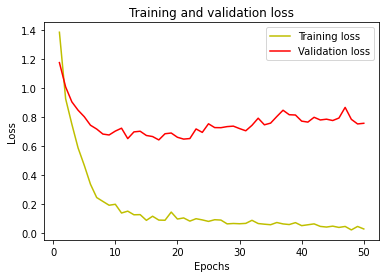

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

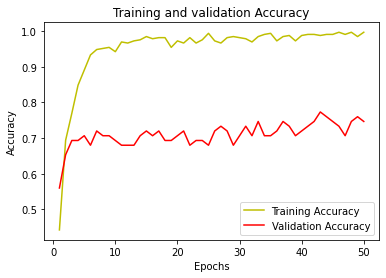

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

__Predictions for Test Data__

In [44]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [45]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose = 0)

Confusion Matrix without normalization
[[3 0 0 2 0]
 [2 2 1 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 1 4]]


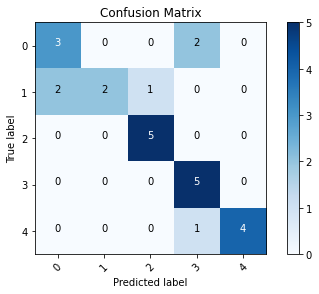

In [46]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#test_batches.class_indices
cm_plot_labels = ["0","1","2","3","4"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

__Predictions for Textual Inversion Trained Stable Diffusion 2 generated data__

In [47]:
#TISD1 were images created by Stable Diffusion with prompt: "<Cézanne> landscape painting"
TISD1_labels = TISD1_batches.classes

In [48]:
predictions = model.predict(x=TISD1_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({3: 8, 4: 9, 1: 7})

In [49]:
predictions

array([[1.01473711e-01, 1.72971077e-02, 1.38775539e-02, 6.78413928e-01,
        1.88937709e-01],
       [1.66919641e-02, 3.54715390e-03, 8.41288478e-04, 1.12721547e-02,
        9.67647433e-01],
       [2.01403558e-01, 3.91882628e-01, 6.18746690e-03, 5.43876328e-02,
        3.46138775e-01],
       [5.89060737e-03, 9.65389132e-01, 5.43382543e-04, 3.02878278e-03,
        2.51481719e-02],
       [1.11011446e-04, 4.71022588e-07, 1.50271399e-06, 8.87872943e-07,
        9.99886155e-01],
       [2.34017804e-01, 6.75766170e-02, 1.24004409e-02, 6.74093604e-01,
        1.19115552e-02],
       [2.40585869e-04, 5.21832258e-02, 1.72997464e-03, 9.04756963e-01,
        4.10892889e-02],
       [1.18388571e-01, 1.37031496e-01, 3.70162237e-03, 6.78994358e-01,
        6.18839711e-02],
       [3.41286473e-02, 2.94968426e-01, 3.50183342e-03, 4.16744202e-02,
        6.25726640e-01],
       [3.21898784e-04, 2.07132124e-03, 2.32145157e-05, 5.28627243e-05,
        9.97530758e-01],
       [2.67832223e-02, 1.0439

In [50]:
#TISD2 were images created by Stable Diffusion with prompt: "<Cézanne>"
TISD2_labels = TISD2_batches.classes

In [51]:
predictions = model.predict(x=TISD2_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({3: 19, 0: 3, 1: 2})

In [52]:
predictions

array([[5.46073169e-03, 2.93850526e-02, 6.92178635e-03, 9.57364321e-01,
        8.68185249e-04],
       [8.27181060e-03, 2.14033633e-01, 2.02043220e-01, 5.74529946e-01,
        1.12136232e-03],
       [4.55426343e-04, 1.14566265e-02, 2.06893450e-03, 9.84306097e-01,
        1.71295367e-03],
       [4.57716882e-02, 6.70074672e-02, 1.31473271e-02, 8.61659706e-01,
        1.24137700e-02],
       [5.55158928e-02, 8.34864471e-03, 1.28187360e-02, 8.93939734e-01,
        2.93768849e-02],
       [5.05698100e-02, 4.72476222e-02, 1.20702870e-02, 7.86930382e-01,
        1.03181913e-01],
       [6.03602052e-01, 2.24665135e-01, 1.53662741e-01, 1.10506145e-02,
        7.01952679e-03],
       [1.09694451e-02, 2.72395406e-02, 4.24588285e-03, 9.47571695e-01,
        9.97342169e-03],
       [1.91035928e-04, 1.70395582e-03, 8.06052762e-04, 9.96968329e-01,
        3.30668699e-04],
       [2.89824784e-01, 2.20678285e-01, 2.69374669e-01, 2.04867989e-01,
        1.52542349e-02],
       [1.65320514e-03, 1.1250